In [1]:
# NewsCloud3   文字雲結合google search
import requests
from bs4 import BeautifulSoup

<!DOCTYPE doctype html>
<html lang="zh-TW">
 <head>
  <meta charset="utf-8"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   facebook - Google 搜尋
  </title>
  <script nonce="h6LWuz7K8stOJMaAxgGxZw==">
   (function(){var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,e=c.responseStart;if(e>d&&e<=window.start){window.start=e;b.wsrt=e-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};google.aft=function(f){f.setAttribute("data-iml",+new Date)};}).call(this);(function(){window.jsarwt=function(){return!1};}).call(this);(function(){var c=[],e=0;window.ping=function(b){-1==b.indexOf("&zx")&&(b+="&zx="+(new Date).getTime());var a=new Image,d=e++;c[d]=a;a.onerror=a.onload=a.onabort=function(){delete c[d]};a.src=b};}).call(this);
  </script>
  <style>
   body{margin:0 auto;max-width:736px;padding:0 8px}a{color:#1967D2;text-decora
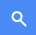
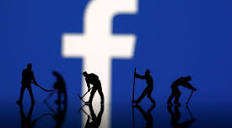
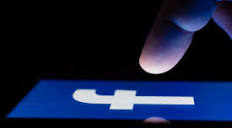

In [2]:
# Google 搜尋 URL
google_url = 'https://www.google.com.tw/search'

# 查詢參數
my_params = {'q': 'facebook'}

# 下載 Google 搜尋結果
r = requests.get(google_url, params = my_params)

# 確認是否下載成功
if r.status_code == requests.codes.ok:
  # 以 BeautifulSoup 解析 HTML 原始碼
  soup = BeautifulSoup(r.text, 'html.parser')

  # 觀察 HTML 原始碼
  print(soup.prettify())


In [3]:
  # 以 CSS 的選擇器來抓取 Google 的搜尋結果
  items = soup.select('div.kCrYT > a[href^="/url"]')
 
  for i in items:
    # 標題
    print("標題：" + i.text)
    # 網址
    print("網址：" + i.get('href'))


標題：Facebookhttps://zh-tw.facebook.com
網址：/url?q=https://zh-tw.facebook.com/&sa=U&ved=2ahUKEwj894v7vcPlAhUxxosBHRH3D3IQFjAAegQIBxAB&usg=AOvVaw2y6NHZhIsVYymSfEysETkQ
標題：Facebook - 维基百科，自由的百科全书https://zh.wikipedia.org › zh-tw › Facebook
網址：/url?q=https://zh.wikipedia.org/zh-tw/Facebook&sa=U&ved=2ahUKEwj894v7vcPlAhUxxosBHRH3D3IQFjAHegQIAxAB&usg=AOvVaw36Ye1y7E2G_sSo6cy_1kZF
標題：facebook 符號：FB、臉書的表情符號、特殊符號 - 工具邦https://tw.piliapp.com › facebook-symbols
網址：/url?q=https://tw.piliapp.com/facebook-symbols/&sa=U&ved=2ahUKEwj894v7vcPlAhUxxosBHRH3D3IQFjAMegQIBhAB&usg=AOvVaw3ZeWAHOb-xVBdiaxX0Nn_7
標題：找出在Facebook中最關心你的朋友 - 工具邦https://tw.piliapp.com › facebook › friends-list
網址：/url?q=https://tw.piliapp.com/facebook/friends-list/&sa=U&ved=2ahUKEwj894v7vcPlAhUxxosBHRH3D3IQFjANegQIBBAB&usg=AOvVaw3VcxXCPkcsUBTwWedD0eX1
標題：See Your Best Friends on Facebookhttps://fb-edge.appspot.com
網址：/url?q=https://fb-edge.appspot.com/&sa=U&ved=2ahUKEwj894v7vcPlAhUxxosBHRH3D3IQFjAOegQIARAB&usg=AOvVaw2h9sO5riB3vrjqiYb9oiCx

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

#讀取文字檔資料
#text = open('news1.txt', "r",encoding="utf-8").read()  #讀文字資料

#讀取Google資料

text = ''
for i in items:
    # 標題
    text = text + i.text
print( text)

jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
print(diction)

Building prefix dict from C:\Users\user\Python\Prg\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.ue49019092eb8f7c7b368ab8274ad7739.cache


Facebookhttps://zh-tw.facebook.comFacebook - 维基百科，自由的百科全书https://zh.wikipedia.org › zh-tw › Facebookfacebook 符號：FB、臉書的表情符號、特殊符號 - 工具邦https://tw.piliapp.com › facebook-symbols找出在Facebook中最關心你的朋友 - 工具邦https://tw.piliapp.com › facebook › friends-listSee Your Best Friends on Facebookhttps://fb-edge.appspot.com【 Facebook 表情符號大全】完整2800 個FB 心情圖案、小圖示、特殊 ...https://www.oxxostudio.tw › facebook-emoji


Loading model cost 0.974 seconds.
Prefix dict has been built succesfully.


Counter({' ': 29, 'tw': 5, 'facebook': 4, 'FB': 2, '表情符號': 2, '工具': 2, '邦': 2, 'piliapp': 2, 'Facebook': 2, 'comFacebook': 1, '维基百科': 1, '自由': 1, '百科全书': 1, 'wikipedia': 1, 'org': 1, 'Facebookfacebook': 1, '符號': 1, '臉書': 1, '特殊符號': 1, 'symbols': 1, '找出': 1, '中': 1, '關心': 1, '朋友': 1, 'friends': 1, 'listSee': 1, 'Your': 1, 'Best': 1, 'Friends': 1, 'on': 1, 'fb': 1, 'edge': 1, 'appspot': 1, '大全': 1, '完整': 1, '2800': 1, '心情': 1, '圖案': 1, '小': 1, '圖示': 1, '特殊': 1, 'www': 1, 'oxxostudio': 1, 'emoji': 1})


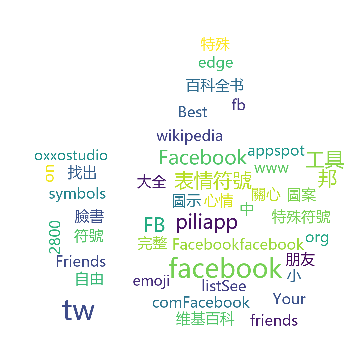

In [5]:
font = "C:\\Windows\\Fonts\\msyh.ttc"  #設定字型(宋體)

mask = np.array(Image.open("like.png"))  #設定文字雲形狀 

wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔